In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
loss = 'mean_squared_error'
metrics = ['mse','mae']
batch_size=64
epochs = 50
image_shape=(227,227,3)

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid', input_shape=image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'),
    

    # flatten the image pixels
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(2048, input_shape=(227*227*3,), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5),

    # 3 neuron fully connected hidden layer
    tf.keras.layers.Dense(3, activation='linear')
])

model.compile(optimizer = tf.keras.optimizers.Adam(0.01), 
              loss = 'mean_squared_error',
              metrics = metrics) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        3

In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SDSS.csv")
train_df = raw_dataset.copy()
train_df

,img_path,z
0,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.037450
1,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
2,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.029610
3,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.002882
4,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.038340
...,...,...
4453,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-100.000000
4454,/content/drive/MyDrive/Colab Notebooks/galaxy_...,-99.990000
4455,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.024300
4456,/content/drive/MyDrive/Colab Notebooks/galaxy_...,0.022220


In [ ]:
import numpy as np
cnt=0
for row in train_df['z']:
    try:
        if row==-99.990000 or row==-100.000000 :
          train_df.loc[cnt, 'z']=np.nan
    except ValueError:
        pass
    cnt+=1

In [ ]:
train_df.isna().sum()

img_path       0
z           1357
dtype: int64

In [ ]:
# median = train_df['z'].median()
# train_df['z'].fillna(median, inplace=True)
train_df = train_df.dropna()

In [ ]:
train_df.isna().sum()

img_path    0
z           0
dtype: int64

In [ ]:
dataset=train_df.copy()

In [ ]:
train_df = dataset.sample(frac=0.8, random_state=0)
test_df = dataset.drop(train_df.index)

In [ ]:
datagen = ImageDataGenerator( 
            rescale=1./255.,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.30,
            fill_mode='nearest')

train_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="training",
            batch_size=64,
            seed=42,
            shuffle=True,
            class_mode="other",
            target_size=(227,227))

valid_generator=datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=None,
            x_col="img_path",
            y_col="z",
            subset="validation",
            batch_size=64,
            seed=42,
            class_mode="other",
            target_size=(227,227))

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
            dataframe=test_df,
            directory=None,
            x_col="img_path",
            y_col=None,
            batch_size=batch_size,
            seed=42,
            class_mode=None,
            target_size=(227,227))           

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 1737 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 744 validated image filenames.
Found 620 validated image filenames.


In [ ]:
from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

# class myCallback(tf.keras.callbacks.Callback): 
#     def on_epoch_end(self, epoch, logs={}): 
#         if(logs.get('loss') < 0.001):   
#           print("\nReached %2.2f%% loss, so stopping training!!" %(0.001*100))   
#           self.model.stop_training = True

# callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=30,
                    steps_per_epoch=10,
                    verbose=1,
                    callbacks=[earlystopper])

Epoch 1/30
28/28 [==============================] - 638s 23s/step - loss: 4.2187 - mse: 4.2187 - mae: 0.6761 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0151
Epoch 2/30
28/28 [==============================] - 275s 10s/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0240 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0157
Epoch 3/30
28/28 [==============================] - 287s 10s/step - loss: 0.0158 - mse: 0.0158 - mae: 0.0212 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0136
Epoch 4/30
28/28 [==============================] - 273s 10s/step - loss: 0.0243 - mse: 0.0243 - mae: 0.0214 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0134
Epoch 5/30
28/28 [==============================] - 281s 10s/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0161 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0186
Epoch 6/30
28/28 [==============================] - 274s 10s/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0203 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0172
Epoch 7/30
28/28

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,1.541771,1.541771,0.302559,0.003102,0.003102,0.015133,0
1,0.020788,0.020788,0.023674,0.003039,0.003039,0.015748,1
2,0.020694,0.020694,0.021591,0.002989,0.002989,0.013624,2
3,0.020591,0.020591,0.020634,0.003013,0.003013,0.013384,3
4,0.020524,0.020524,0.019766,0.003110,0.003110,0.018628,4
5,0.020583,0.020583,0.021784,0.003052,0.003052,0.017166,5
6,0.020628,0.020628,0.020304,0.002983,0.002983,0.013275,6
7,0.020592,0.020592,0.019230,0.003003,0.003003,0.013502,7
8,0.020500,0.020500,0.019253,0.002997,0.002997,0.013720,8
9,0.020473,0.020473,0.017864,0.003001,0.003001,0.014967,9


In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [z]')
  plt.legend()
  plt.grid(True)

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Err [z]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Err [$z^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
  plt.legend()



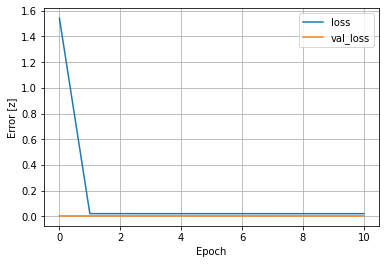

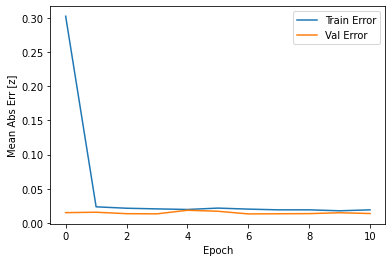

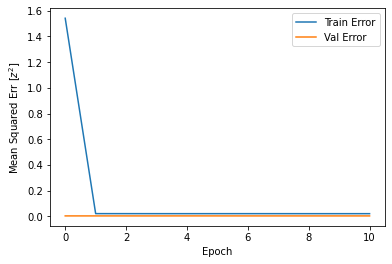

In [ ]:
plot_loss(history)

In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=30,
                    # steps_per_epoch=10,
                    verbose=1,
                    callbacks=[earlystopper])

Epoch 1/30
28/28 [==============================] - 277s 10s/step - loss: 0.0205 - mse: 0.0205 - mae: 0.0190 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0147
Epoch 2/30
28/28 [==============================] - 279s 10s/step - loss: 0.0205 - mse: 0.0205 - mae: 0.0175 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0140
Epoch 3/30
28/28 [==============================] - 274s 10s/step - loss: 0.0204 - mse: 0.0204 - mae: 0.0182 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0149
Epoch 4/30
28/28 [==============================] - 284s 10s/step - loss: 0.0204 - mse: 0.0204 - mae: 0.0175 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0143
Epoch 5/30
28/28 [==============================] - 274s 10s/step - loss: 0.0204 - mse: 0.0204 - mae: 0.0181 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0139
Epoch 6/30
28/28 [==============================] - 280s 10s/step - loss: 0.0204 - mse: 0.0204 - mae: 0.0182 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0145
Epoch 00006: ear

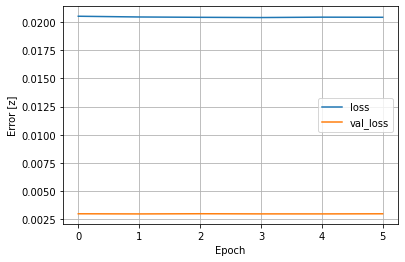

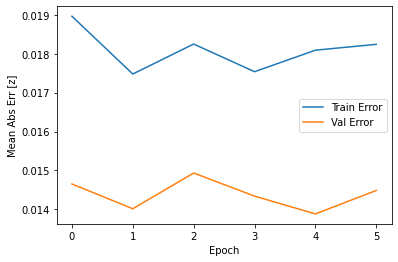

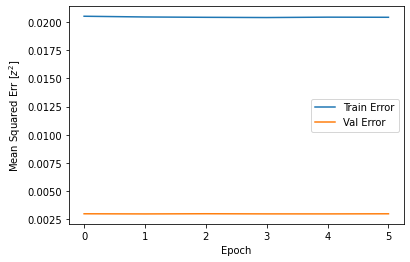

In [ ]:
plot_loss(history)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Zmodel_normal")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Zmodel_normal/assets


In [ ]:
test_features = test_df.copy()
test_labels = test_features.pop('z')

In [ ]:
test_predictions = model.predict(test_generator)


In [ ]:
test_predictions

array([[0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.02446024],
       [0.024

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/normalpredictions', test_predictions)

In [ ]:
result={}

In [ ]:
result['Predicted'] = test_predictions

In [ ]:
result['z'] = np.array (test_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true = result['z'], y_pred = result['Predicted'])
RMSE = MSE**(0.5)

In [ ]:
print(MSE)
print(RMSE)

0.059609204411127714
0.24414996295540925


In [ ]:
result['Predicted']=test_predictions.flatten()

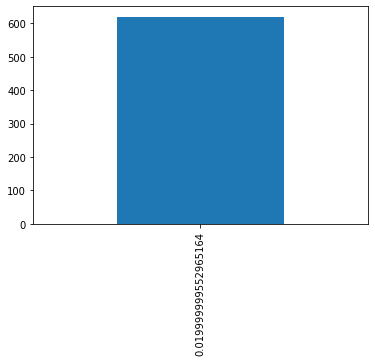

In [ ]:
fig1 = plt.gcf()
pd.value_counts(result['Predicted'].round(2)).sort_index().plot(kind="bar")

In [ ]:
test_predictions = np.load("/content/drive/MyDrive/Colab Notebooks/normalpredictions.npy")

In [ ]:
spec=test_labels.to_numpy()

In [ ]:
outlier=(spec-test_predictions)/(1+spec)

In [ ]:
outlier

array([[ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       ...,
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385],
       [ 0.01252085,  0.01336726,  0.85265925, ...,  0.00578382,
        -0.00991743,  0.00244385]])

In [ ]:
f=pd.DataFrame(outlier)


In [ ]:
f[0].median()

0.012520852861786363